## Computational effort
In [1], Viola and Jones introduced a very efficient object detection algorithm. As most other object detectors of the time, it sees object detection as a binary _classification problem_; It runs a window over the entire image at various scales and for each sample classifies it as the object of interest or not. The computational efficiency of the method derives from the use of integral images - allowing the quick determination of 'Haar' feature values irrespective of their scale - and the use of cascades of weak classifiers - allowing to quickly reject most samples, before extracting too many features from the sample.

Below, you  will play with the parameters of the algorithm, as executed by OpenCV, and gauge the impact on the processing time.

<font color='red'><B>Exercise 1.</B></font> First check if you can use your webcam. This can only be the case if you run the notebook locally. You can test it by running the code in the cell below. Depending on whether it works, go the right part of the notebook.

In [1]:
import live
live.check_webcam();

Webcam is working.


## Webcam works
<font color='red'><B>Exercise 2.</B></font>
The below code imports the file `live.py`, which detects faces in the images coming from your webcam <A HREF="https://github.com/guidoAI/computational_effort_notebook/blob/master/live.py" TARGET="_blank">(link to file)</A>. It runs the OpenCV face detector on the images. You will see a new window that shows the images and detections (with green boxes), and you will see below a print-out with a carriage return of the number of faces found and the time that the algorithm takes in seconds.

1. Can you make the execution time larger or smaller by manipulating the content of the images? How is the execution time related to the content? 

You can stop the script by clicking the 'Stop' symbol on the toolbar (next to 'Run').

In [2]:
live.run_detection();

KeyboardInterrupt: 

<font color='red'><B>Exercise 3.</B></font>
Below, you can see the code that was run above. The function `run_detection` takes three parameters:
`scale_factor`, `min_neighbors`, and `min_size` (<A HREF="https://docs.opencv.org/2.4/modules/objdetect/doc/cascade_classification.html" TARGET="_blank">documentation of the OpenCV function</A>).

1. Can you make the algorithm run much faster by changing the parameters? Why does it become much faster? Does it influence the performance of the algorithm in any significant way?
2. Can you make the algorithm much faster by other means, e.g., adding more parameters or intervening (adding / changing code) in the `run_detection` function? How, and why does the execution time change? Does this affect the performance in any significant way?

In [4]:
import cv2
import time

def run_detection(scale_factor = 1.1, min_neighbors = 5, min_size = 30):
    cap = cv2.VideoCapture(0)
    if(not cap.isOpened()):  
        print('Video capture not initialized!');
        return -1;
    
    # Create the haar cascade
    faceCascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
    
    while(True):
    	# Capture frame-by-frame
    	ret, frame = cap.read(); start_time = time.time();
        
    	# Our operations on the frame come here
    	gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    	# Detect faces in the image
    	faces = faceCascade.detectMultiScale(
    		gray,
    		scaleFactor=scale_factor,
    		minNeighbors=min_neighbors,
    		minSize=(min_size, min_size),
    		#flags = cv2.CV_HAAR_SCALE_IMAGE
    	); end_time = time.time();
    
    	print("Found {0} faces, in {1} seconds.".format(len(faces), end_time - start_time), end='\r')
    
    	# Draw a rectangle around the faces
    	for (x, y, w, h) in faces:
    		cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
    
    
    	# Display the resulting frame
    	cv2.imshow('frame', frame)
    	if cv2.waitKey(1) & 0xFF == ord('q'):
    		break
    
    # When everything done, release the capture
    cap.release()
    cv2.destroyAllWindows()

# play with the parameters:
scale_factor = 1.1;
min_neighbors = 5;
min_size = 30;
run_detection(scale_factor, min_neighbors, min_size);

KeyboardInterrupt: 

## Webcam does not work
<font color='red'><B>Exercise 4.</B></font>
Instead of using the webcam, we will load an image. The function `run_detection_on_image` takes the following three parameters:
`scale_factor`, `min_neighbors`, and `min_size` (<A HREF="https://docs.opencv.org/2.4/modules/objdetect/doc/cascade_classification.html" TARGET="_blank">documentation of the OpenCV function</A>). You can change the parameters at the bottom of the following code cell.

1. Can you make the algorithm run much faster by changing the parameters? Why does it become much faster? Does it influence the performance of the algorithm in any significant way?
2. Can you make the algorithm much faster by other means, e.g., adding more parameters or intervening (adding / changing code) in the `run_detection` function? How, and why does the execution time change? Does this affect the performance in any significant way?

Found 1 faces, in 0.02593207359313965 seconds.


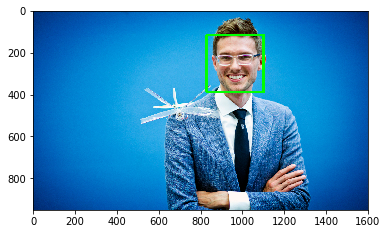

In [7]:
import cv2
import time
import matplotlib.pyplot as plt

%matplotlib inline

def run_detection_on_image(image_name='./images/Guido_DelFly.jpg', scale_factor = 1.1, min_neighbors = 5, min_size = 30):

    # Create the haar cascade      
    faceCascade = cv2.CascadeClassifier("haarcascade_frontalface_default.xml")
    
    # Load the image:  
    BGR = cv2.imread(image_name);
    
    # get the starting time:
    start_time = time.time();
    
    # convert the image to gray scale:
    gray = cv2.cvtColor(BGR, cv2.COLOR_BGR2GRAY);
    
    # detect the faces with the Viola and Jones method:
    faces = faceCascade.detectMultiScale(gray, 
                                         scaleFactor=scale_factor, minNeighbors=min_neighbors, 
                                         minSize=(min_size, min_size));
    
    # get the end time:
    end_time = time.time();
    
    # Report on number of faces and processing time:
    print("Found {0} faces, in {1} seconds.".format(len(faces), end_time - start_time));
    
    # Draw a rectangle around the found faces:
    rectangle_color = (0, 255, 0);
    line_width = 10;
    for (x, y, w, h) in faces:
        cv2.rectangle(BGR, (x, y), (x+w, y+h), rectangle_color, line_width)
    
    # Show the image:
    plt.imshow(cv2.cvtColor(BGR, cv2.COLOR_BGR2RGB))
    plt.show()

# play with the parameters:
scale_factor = 1.5;
min_neighbors = 4;
min_size = 50;
run_detection_on_image(scale_factor=scale_factor, min_neighbors=min_neighbors, min_size=min_size);

## References
[1] Viola, P., & Jones, M. (2001). Rapid object detection using a boosted cascade of simple features. In Computer Vision and Pattern Recognition, 2001. CVPR 2001. Proceedings of the 2001 IEEE Computer Society Conference on (Vol. 1, pp. I-511). 


## Answers

Exercise 2. 

Webcam works: The execution time can be increased by adding more texture in the scene. Then the V&J detector will not be able to reject samples as quickly as when there is less texture. More faces also means more processing time.

Exercise 3 & 4.

1. The parameter ``scale_factor`` influences the computation time. If set higher, less processing is performed. However, also fewer faces are found, as fewer pyramid levels are searched. The parameter ``min_neighbors`` does not influence processing time. It does influence the performance, as setting it low (e.g., 0 or 1) will result in more detections (false and true positives). The parameter ``min_size`` does influence computation time. Setting it higher means that smaller windows are not searched and reduces processing time. This also means that smaller faces are not found.

2. One can add also a max size, with, e.g., ``maxSize=(60, 60)``. This will reduce processing time, and the detection of large faces. One can also reduce the image size before passing it to the V&J detector. This will mean extra processing for the scaling, but less for the detection. 